In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_theme()

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./test.csv
./train.csv
./.config/.last_survey_prompt.yaml
./.config/active_config
./.config/.last_update_check.json
./.config/config_sentinel
./.config/.last_opt_in_prompt.yaml
./.config/gce
./.config/logs/2023.05.03/13.30.53.412375.log
./.config/logs/2023.05.03/13.31.21.082174.log
./.config/logs/2023.05.03/13.31.20.347025.log
./.config/logs/2023.05.03/13.30.18.933743.log
./.config/logs/2023.05.03/13.29.51.883151.log
./.config/logs/2023.05.03/13.30.45.111331.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/mnist_test.csv
./sample_data/mnist_train_small.csv
./sample_data/california_housing_test.csv
./sample_data/california_housing_train.csv


In [ ]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print(train_data.shape)
print(train_data.columns)
print(test_data.shape)
train_data.head()

(7613, 5)
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
(3263, 4)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_data = train_data.drop('id',axis = 1)
test_data = test_data.drop('id',axis = 1)
test_data.head()

,keyword,location,text
0,NaN,NaN,Just happened a terrible car crash
1,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test_data = test_data.fillna('')
train_data = train_data.fillna('')

In [ ]:
import re
def keyword_correction(x):
    try:
        x = x.split("%20")
        x = ' '.join(x)
        return x
    except:
        return x

In [ ]:
train_data['keyword'] = train_data['keyword'].apply(lambda x: keyword_correction(x))
test_data['keyword'] = test_data['keyword'].apply(lambda x: keyword_correction(x))

In [ ]:
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
def text_cleaning(text):
    forbidden_words = set(stopwords.words('english'))
    if text:
        text = ' '.join(text.split('.'))
        text = re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', text.strip().lower())).strip()
        text = re.sub(r'\W+', ' ', text.strip().lower()).strip()
        text = [word for word in text.split() if word not in forbidden_words]
        return text
    return []

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"}

puncts = puncts + list(string.punctuation)

def clean_text(x):
    x = str(x).replace("\n","")
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
    return x


def clean_numbers(x):
    x = re.sub('\d+', ' ', x)
    return x


def replace_typical_misspell(text):
    mispellings_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))

    def replace(match):
        return mispell_dict[match.group(0)]

    return mispellings_re.sub(replace, text)

def remove_space(string):
    string = BeautifulSoup(string).text.strip().lower()
    string = re.sub(r'((http)\S+)', 'http', string)
    string = re.sub(r'\s+', ' ', string)
    return string


def clean_data(df, columns: list):
    
    for col in columns:
        df[col] = df[col].apply(lambda x: remove_space(x).lower())        
        df[col] = df[col].apply(lambda x: replace_typical_misspell(x))
        df[col] = df[col].apply(lambda x: clean_text(x))
        
    return df

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
for col in ['location','text']:
    train_data[col] = train_data[col].apply(lambda x: ' '.join(text_cleaning(x)))
    test_data[col] = test_data[col].apply(lambda x: ' '.join(text_cleaning(x)))
train_data = clean_data(train_data,['keyword','text'])
test_data = clean_data(test_data,['keyword','text'])

In [ ]:
!python -m spacy download en_core_web_lg

2023-05-07 10:20:40.427064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 10:20:41.580764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
def location_detection(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append(ent)
    if len(entities)>0:
        return 1
    return 0

In [ ]:
train_data['original_locations'] = train_data['location'].apply(lambda x: location_detection(x))
test_data['original_locations'] = test_data['location'].apply(lambda x: location_detection(x))

In [ ]:
spam_locations = ['place','room','home','somewhere','nowhere','everywhere','location',
                  'dope','kidding','moon','wherever','dimension','world','fvck','fuck','beside']
def is_location_spammy(text):
    for word in spam_locations:
        if word in text:
            return 1
    return 0

In [ ]:
train_data['Is_location_spam'] = train_data['location'].apply(lambda x: is_location_spammy(x))
test_data['Is_location_spam'] = test_data['location'].apply(lambda x: is_location_spammy(x))


In [ ]:
def digit_counter(text):
    """detects any digit in any token and counts
       once par token."""
    sum_number = 0
    doc = nlp(text)
    for token in doc:
        sum_number += bool(re.search(r'\d', token.text))*1
    return sum_number    

In [ ]:
train_data['digit_count_location'] = train_data['location'].apply(lambda x: digit_counter(x))
test_data['digit_count_location'] = test_data['location'].apply(lambda x: digit_counter(x))

In [ ]:
disaster_tweets =' '.join(train_data[train_data['target'] == 1]['text'].tolist())
non_disaster_tweets = ' '.join(train_data[train_data['target'] == 0]['text'].tolist())

In [ ]:
import nltk
import gensim
from gensim.models import HdpModel

def return_top_words(text, words=10):
    
    all_words = nltk.tokenize.word_tokenize(text)
    
    stop_words = nltk.corpus.stopwords.words('english')
    all_words_except_stop_dist = nltk.FreqDist(w.lower() for w in all_words if w not in stop_words)
    
    
    dictionary = gensim.corpora.Dictionary([all_words_except_stop_dist])
    
    corpus = [dictionary.doc2bow([text])]

    
    hdp_model = HdpModel(corpus, dictionary)
    topics = hdp_model.show_topics(num_topics=-1, num_words=words)
    
    
    top_words = []
    for topic in topics:
        words = [word for word, prob in hdp_model.show_topic(topic[0], topn=words)]
        top_words.append(words)
    
    return top_words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
top_50_disaster_words = return_top_words(disaster_tweets,50)
top_50_nondisaster_words = return_top_words(non_disaster_tweets,50)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
top_200_disaster_words = return_top_words(disaster_tweets,400)
top_200_nondisaster_words = return_top_words(non_disaster_tweets,400)
top_disaster_exclusive = list(set(top_200_disaster_words).difference(set(top_200_nondisaster_words)))
top_nondisaster_exclusive = list(set(top_200_nondisaster_words).difference(set(top_200_disaster_words)))

In [ ]:
total_vocab = top_disaster_exclusive + top_nondisaster_exclusive

In [ ]:
for word in total_vocab:
    train_data['Is_'+word+'_present'] = train_data['text'].apply(lambda x: (word in x)*1)
    test_data['Is_'+word+'_present'] = test_data['text'].apply(lambda x: (word in x)*1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         max_features = 5000,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(train_data['text'])
X_test_tfidf = tf_idf.transform(test_data['text'])
tf_kw = TfidfVectorizer(ngram_range = (1,2),
                        binary = True,
                        max_features = 1500,
                        smooth_idf = False)
kw_train_tfidf = tf_kw.fit_transform(train_data['keyword'])
kw_test_tfidf = tf_kw.transform(test_data['keyword'])
tf_location = TfidfVectorizer(ngram_range = (1,2),
                              binary = True,
                              max_features = 1500,
                              smooth_idf = False)
location_train_tfidf = tf_location.fit_transform(train_data['location'])
location_test_tfidf = tf_location.transform(test_data['location'])

In [ ]:
train_data = pd.concat([train_data,pd.DataFrame(X_train_tfidf.toarray(),
                                                columns = ['text_contains_'+ str(text) for text in tf_idf.get_feature_names_out()]),
                        pd.DataFrame(kw_train_tfidf.toarray(),
                                     columns = ['keyword_contains_'+str(text) for text in tf_kw.get_feature_names_out()]),
                        pd.DataFrame(location_train_tfidf.toarray(),
                                     columns = ['location_contains_'+str(text) for text in tf_location.get_feature_names_out()])],axis = 1)
test_data = pd.concat([test_data,pd.DataFrame(X_test_tfidf.toarray(),
                                              columns = ['text_contains_'+ str(text) for text in tf_idf.get_feature_names_out()]),
                       pd.DataFrame(kw_test_tfidf.toarray(),
                                    columns = ['keyword_contains_'+str(text) for text in tf_kw.get_feature_names_out()]),
                       pd.DataFrame(location_test_tfidf.toarray(),
                                    columns = ['location_contains_'+str(text) for text in tf_location.get_feature_names_out()])],axis = 1)

In [ ]:
def create_vec(dataframe):
    texts = dataframe['text'].tolist()
    vectors = []
    for doc in nlp.pipe(texts):
        vectors.append(list(doc.vector))
    df = pd.DataFrame(vectors,columns = ['vec_'+str(i) for i in range(300)])
    return df
vec_train = create_vec(train_data)
vec_test = create_vec(test_data)
train_data = pd.concat([train_data,vec_train],axis = 1)
test_data = pd.concat([test_data,vec_test],axis = 1)


In [ ]:
train_data = train_data.drop(['keyword','location','text'],axis = 1)
test_data = test_data.drop(['keyword','location','text'],axis = 1)

In [ ]:
X_train = train_data.drop('target',axis = 1)
Y_train = train_data['target']
print('target' in test_data.columns)

False


In [ ]:
len(train_data.columns)

7070

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, roc_auc_score, fbeta_score, make_scorer
forest = rfc(n_estimators = 128,max_depth = 8,min_samples_split = 15,
             class_weight = {0:1,1:1.6},oob_score = True)
forest.fit(X_train.values,Y_train.values)
print(forest.oob_score_)
Y_pred_train = forest.predict(X_train.values)
print(classification_report(Y_pred_train,Y_train))


Y_pred_prob_train = forest.predict_proba(X_train.values)[:, 1]
auc_score_train = roc_auc_score(Y_train.values, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train.values, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

0.7443846052804414
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4056
           1       0.85      0.78      0.81      3557

    accuracy                           0.83      7613
   macro avg       0.84      0.83      0.83      7613
weighted avg       0.84      0.83      0.83      7613

AUC Score on train set:  0.9224304254647115
F0.5 Score on train set:  0.7949025658609062


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model,X_train,Y_train):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train, Y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [ ]:

import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, fbeta_score, make_scorer
xgb = XGBClassifier(n_estimators=200,learning_rate = 0.2,max_depth = 8)
training_start = time.perf_counter()
xgb.fit(X_train.values, Y_train.values)
training_end = time.perf_counter()
xgb_train_time = training_end-training_start
print("Time consumed for training: %4.3f" % (xgb_train_time))

Time consumed for training: 806.726


In [ ]:
prediction_start = time.perf_counter()
pred_final = xgb.predict(test_data.values)
pred_train = xgb.predict(X_train.values)
print(classification_report(Y_train,pred_train))
print(test_data.values)
print(pred_final)
prediction_end = time.perf_counter()
xgb_prediction_time = prediction_end-prediction_start
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
# Calculate AUC score
Y_pred_prob_train = xgb.predict_proba(X_train.values)[:, 1]
auc_score_train = roc_auc_score(Y_train.values, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

# Calculate f0.5 score
fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train.values, pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4342
           1       0.99      0.99      0.99      3271

    accuracy                           0.99      7613
   macro avg       0.99      0.99      0.99      7613
weighted avg       0.99      0.99      0.99      7613

[[ 0.          0.          0.         ...  2.21758246  0.90735507
   0.08885002]
 [ 0.          0.          0.         ...  0.4484143  -1.24453855
   2.66093993]
 [ 0.          0.          0.         ... -1.85572815 -1.42793274
   1.81197727]
 ...
 [ 0.          0.          0.         ... -0.93268573 -2.13055134
  -0.55490571]
 [ 0.          0.          0.         ... -0.7221151  -1.79182541
   1.00080121]
 [ 0.          0.          0.         ... -1.04589999  1.15317166
   2.02882838]]
[0 0 1 ... 0 1 1]
Time consumed for prediction: 3.90756 seconds
AUC Score on train set:  0.999790004451272
F0.5 Score on train set:  0.9923734547020111


In [ ]:
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(class_weight={0:1, 1:1.6})
logreg.fit(X_train, Y_train)

Y_pred_train = logreg.predict(X_train)
print(classification_report(Y_pred_train, Y_train))

# Calculate AUC score
Y_pred_prob_train = logreg.predict_proba(X_train)[:, 1]
auc_score_train = roc_auc_score(Y_train, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

# Calculate f0.5 score
fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4134
           1       0.83      0.78      0.81      3479

    accuracy                           0.83      7613
   macro avg       0.83      0.82      0.82      7613
weighted avg       0.83      0.83      0.83      7613

AUC Score on train set:  0.9049850584558606
F0.5 Score on train set:  0.7904229941234654


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf', gamma='auto', class_weight={0:1, 1:1.6})
svm.fit(X_train.values, Y_train.values)

Y_pred_train = svm.predict(X_train.values)
print(classification_report(Y_pred_train, Y_train))

# Calculate AUC score
Y_pred_prob_train = svm.decision_function(X_train.values)
auc_score_train = roc_auc_score(Y_train, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

# Calculate f0.5 score
fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4051
           1       0.80      0.73      0.76      3562

    accuracy                           0.79      7613
   macro avg       0.79      0.78      0.78      7613
weighted avg       0.79      0.79      0.79      7613

AUC Score on train set:  0.8657728167116605
F0.5 Score on train set:  0.7429077002111992


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb = GaussianNB()
nb.fit(X_train.values, Y_train.values)

Y_pred_train = nb.predict(X_train.values)
print(classification_report(Y_pred_train, Y_train))
# Calculate f0.5 score
fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      5358
           1       0.66      0.96      0.78      2255

    accuracy                           0.84      7613
   macro avg       0.82      0.88      0.83      7613
weighted avg       0.89      0.84      0.85      7613

F0.5 Score on train set:  0.8807257342771134


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, fbeta_score

dtc = DecisionTreeClassifier(max_depth=8, min_samples_split=15, class_weight={0:1, 1:1.6})
dtc.fit(X_train.values, Y_train.values)

Y_pred_train = dtc.predict(X_train.values)
print(classification_report(Y_pred_train, Y_train))

# Calculate AUC score
Y_pred_prob_train = dtc.predict_proba(X_train.values)[:,1]
auc_score_train = roc_auc_score(Y_train, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

# Calculate f0.5 score
fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      3579
           1       0.91      0.74      0.82      4034

    accuracy                           0.83      7613
   macro avg       0.84      0.83      0.83      7613
weighted avg       0.84      0.83      0.82      7613

AUC Score on train set:  0.9042172457286588
F0.5 Score on train set:  0.7698253207605502


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer

gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
gb.fit(X_train, Y_train)

Y_pred_train = gb.predict(X_train)
print(classification_report(Y_pred_train, Y_train))

Y_pred_prob_train = gb.predict_proba(X_train)[:, 1]
auc_score_train = roc_auc_score(Y_train, Y_pred_prob_train)
print("AUC Score on train set: ", auc_score_train)

fbeta_score_train = make_scorer(fbeta_score, beta=0.5)
f05_score_train = fbeta_score(Y_train, Y_pred_train, beta=0.5)
print("F0.5 Score on train set: ", f05_score_train)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4752
           1       0.75      0.86      0.80      2861

    accuracy                           0.84      7613
   macro avg       0.83      0.84      0.83      7613
weighted avg       0.85      0.84      0.84      7613

AUC Score on train set:  0.9145477241551984
F0.5 Score on train set:  0.8341828066598709


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


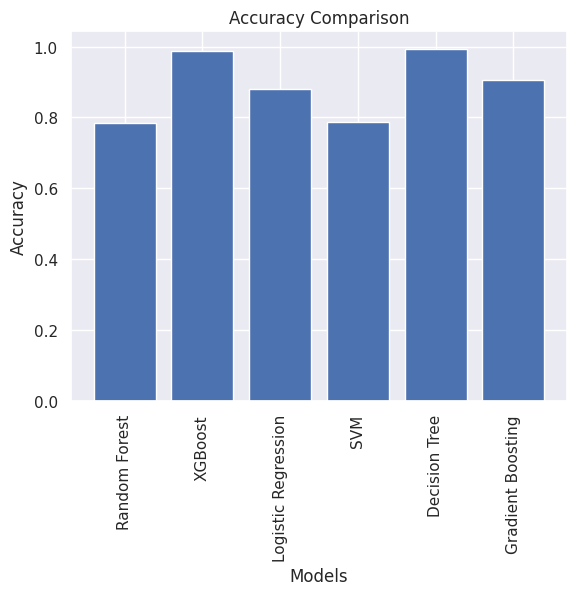

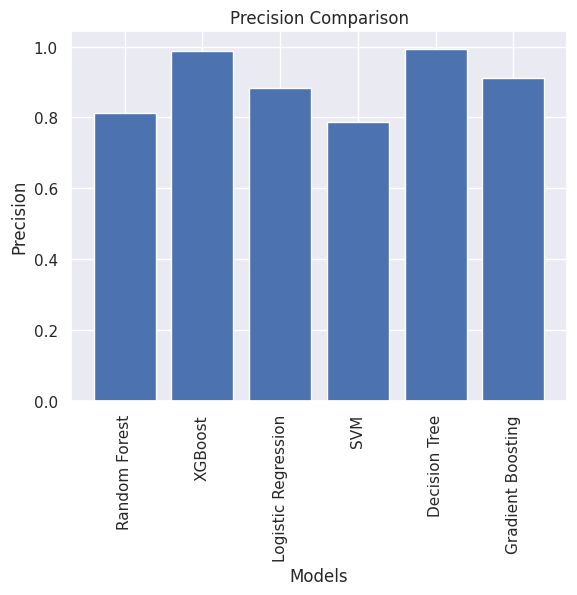

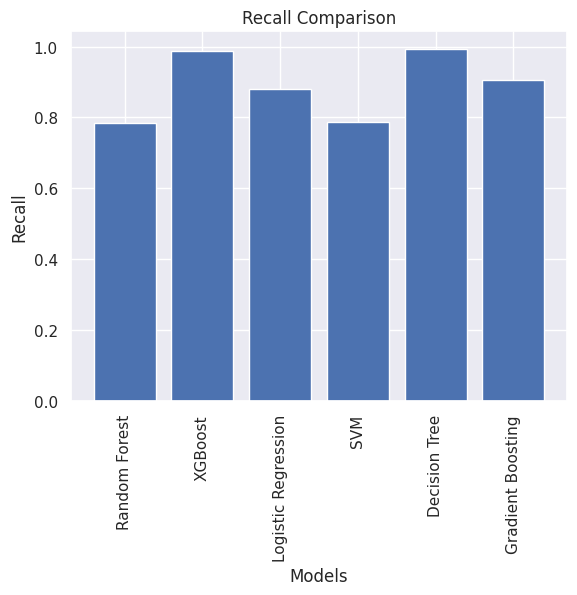

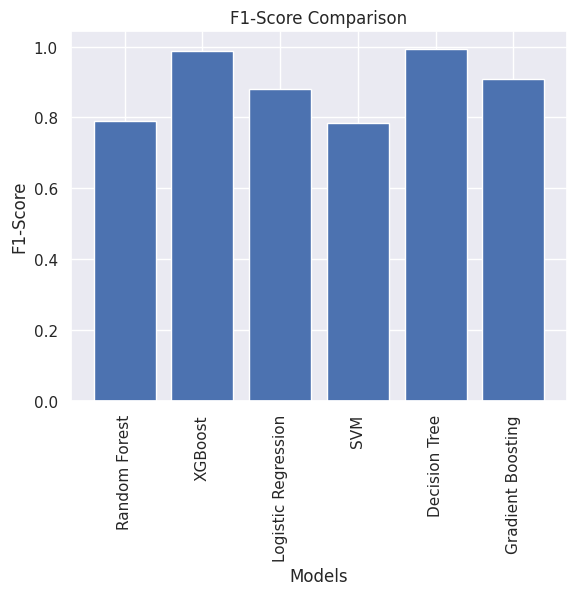

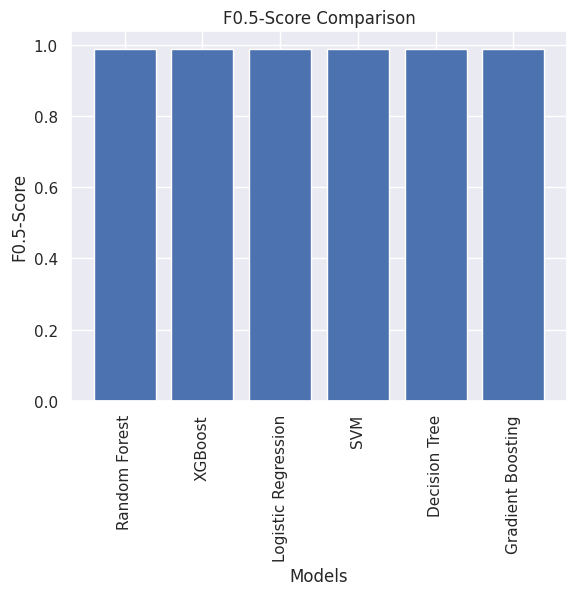

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Random Forest
forest = rfc(n_estimators=100, max_depth=5, random_state=1)
forest.fit(X_train, Y_train)
Y_pred_train_forest = forest.predict(X_train)
forest_report = classification_report(Y_pred_train_forest, Y_train, output_dict=True)
forest_scores = [forest_report['accuracy'], forest_report['weighted avg']['precision'], forest_report['weighted avg']['recall'], forest_report['weighted avg']['f1-score']]

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
pred_train_xgb = xgb.predict(X_train)
xgb_report = classification_report(Y_train,pred_train_xgb, output_dict=True)
xgb_scores = [xgb_report['accuracy'], xgb_report['weighted avg']['precision'], xgb_report['weighted avg']['recall'], xgb_report['weighted avg']['f1-score']]

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred_train_logreg = logreg.predict(X_train)
logreg_report = classification_report(Y_pred_train_logreg, Y_train, output_dict=True)
logreg_scores = [logreg_report['accuracy'], logreg_report['weighted avg']['precision'], logreg_report['weighted avg']['recall'], logreg_report['weighted avg']['f1-score']]

# SVM
svm = SVC(kernel='rbf', gamma='auto', class_weight={0:1, 1:1.6})
svm.fit(X_train, Y_train)
Y_pred_train_svm = svm.predict(X_train)
svm_report = classification_report(Y_pred_train_svm, Y_train, output_dict=True)
svm_scores = [svm_report['accuracy'], svm_report['weighted avg']['precision'], svm_report['weighted avg']['recall'], svm_report['weighted avg']['f1-score']]

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_train_dt = dt.predict(X_train)
dt_report = classification_report(Y_pred_train_dt, Y_train, output_dict=True)
dt_scores = [dt_report['accuracy'], dt_report['weighted avg']['precision'], dt_report['weighted avg']['recall'], dt_report['weighted avg']['f1-score']]

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1)
gb.fit(X_train, Y_train)
Y_pred_train_gb = gb.predict(X_train)
gb_report = classification_report(Y_pred_train_gb, Y_train, output_dict=True)
gb_scores = [gb_report['accuracy'], gb_report['weighted avg']['precision'], gb_report['weighted avg']['recall'], gb_report['weighted avg']['f1-score']]

# Graph 1: Accuracy Comparison
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Decision Tree', 'Gradient Boosting']
accuracy = [forest_scores[0], xgb_scores[0], logreg_scores[0], svm_scores[0], dt_scores[0], gb_scores[0]]

plt.bar(models, accuracy)
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

# Graph 2: Precision Comparison
precision = [forest_scores[1], xgb_scores[1], logreg_scores[1], svm_scores[1], dt_scores[1], gb_scores[1]]

plt.bar(models, precision)
plt.title('Precision Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.show()

recall = [forest_scores[2], xgb_scores[2], logreg_scores[2], svm_scores[2], dt_scores[2], gb_scores[2]]

plt.bar(models, recall)
plt.title('Recall Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.show()

f1 = [forest_scores[3], xgb_scores[3], logreg_scores[3], svm_scores[3], dt_scores[3], gb_scores[3]]

plt.bar(models, f1)
plt.title('F1-Score Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('F1-Score')
plt.show()

from sklearn.metrics import fbeta_score, roc_auc_score

# F0.5-Score Comparison
beta = 0.5
f05_scores = []
for scores in [forest_scores, xgb_scores, logreg_scores, svm_scores, dt_scores, gb_scores]:
    f05 = fbeta_score(Y_train, pred_train_xgb, beta=beta, average='weighted')
    f05_scores.append(f05)

plt.bar(models, f05_scores)
plt.title(f'F{beta}-Score Comparison')
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel(f'F{beta}-Score')
plt.show()
